In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set random seeds for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

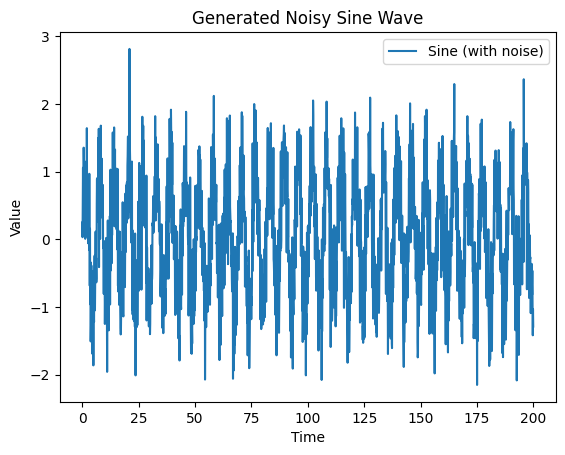

In [2]:
# Generate time series data
data_time = np.arange(0, 200, 0.1)
sin_values = np.sin(data_time) + np.random.normal(scale=0.5, size=len(data_time))

# Plot the data
plt.plot(data_time, sin_values, label='Sine (with noise)')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Generated Noisy Sine Wave")
plt.legend()
plt.show()

In [3]:
# Create DataFrame
data_full = pd.DataFrame({"sine": sin_values}, index=data_time)

# Split into train and test sets
len_train = int(len(data_full) * 0.8)
train, test = data_full.iloc[:len_train], data_full.iloc[len_train:]

# Function to create sequences
def gen_data(X, y, num_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - num_steps):
        Xs.append(X.iloc[i:(i + num_steps)].values)
        ys.append(y.iloc[i + num_steps])
    return np.array(Xs), np.array(ys)

# Generate sequences
num_steps = 10
trainX, trainY = gen_data(train, train['sine'], num_steps)
testX, testY = gen_data(test, test['sine'], num_steps)

In [4]:
# Define the LSTM model
lstm_model = keras.Sequential([
    layers.LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])),
    layers.Dense(1)
])

# Compile the model
lstm_model.compile(optimizer=keras.optimizers.Adam(0.001), loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3925 - val_loss: 0.3579
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3081 - val_loss: 0.3555
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3074 - val_loss: 0.3542
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3069 - val_loss: 0.3528
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.3063 - val_loss: 0.3513
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3056 - val_loss: 0.3495
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3047 - val_loss: 0.3476
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3038 - val_loss: 0.3462
Epoch 9/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3030 - val_loss: 0.3451
Epoch 10/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3024 - val_loss: 0.3442
Epoch 11/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3018 - val_loss: 0.3435
Epoch 12/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.301

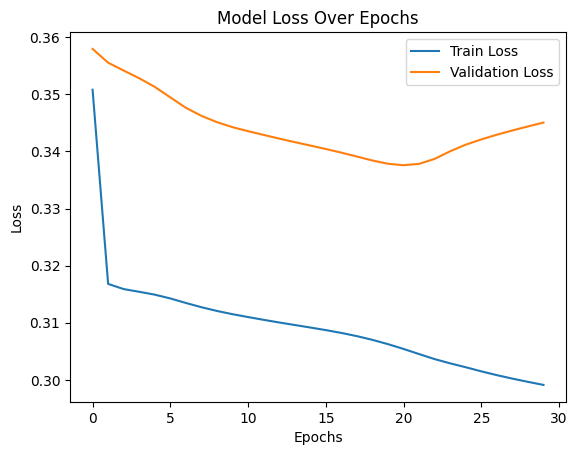

In [5]:
# Set early stopping criteria
early_stopping = keras.callbacks.EarlyStopping(monitor="loss", patience=3)

# Train the model
history = lstm_model.fit(trainX, trainY,
                         epochs=30,
                         batch_size=16,
                         validation_split=0.1,
                         shuffle=False,
                         callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Over Epochs")
plt.legend()
plt.show()

In [6]:
# Evaluate the model
test_loss = lstm_model.evaluate(testX, testY)
print("Test Loss:", test_loss)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3059
Test Loss: 0.30411189794540405
